In [61]:
import numpy as np
import pandas as pd


In [62]:

df = pd.read_csv('spam.csv', encoding='ISO-8859-1')


In [63]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4893,ham,Convey my regards to him,NaN,NaN,NaN
4494,ham,Hope this text meets you smiling. If not then ...,NaN,NaN,NaN
1070,ham,"alright, I'll make sure the car is back tonight",NaN,NaN,NaN
1081,ham,Can u get pic msgs to your phone?,NaN,NaN,NaN
2719,ham,Go where n buy? Juz buy when we get there lar.,NaN,NaN,NaN


In [64]:
df.shape

(5572, 5)

#**1.DATA CLEANING**


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [66]:
#clear last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [67]:
df.sample()

,v1,v2
2625,spam,"FREE RING TONE just text \POLYS\"" to 87131. Th..."


In [68]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [69]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()


In [70]:
df['target']=encoder.fit_transform(df['target'])

In [71]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [72]:
#check missing values
df.isnull().sum()

,0
target,0
text,0


In [73]:
# check no of duplicate values
df.duplicated().sum()
#initially there were some values bu ti rerun it after removing dupliacates so they got removed

np.int64(403)

In [74]:
# remove duplicates
df.drop_duplicates(keep='first')

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [75]:
df.duplicated().sum()

np.int64(403)

In [76]:
df.shape

(5572, 2)

# **2.EDA(Exploratory Data Analysis)**

In [77]:
#check counts of ham/spam (0/1 in the target column)
df['target'].value_counts()

,count
target,
0,4825
1,747


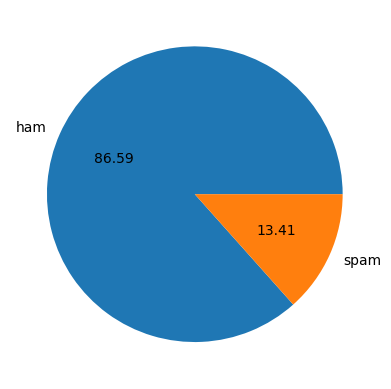

In [78]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [79]:
#after looking at pie chart we can see data is imbalanced
#now we are creating three new columns for deeper analysis
# by no of characters in the sms
# by no of words in the sms
# by no of sentences in the sms

In [80]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [81]:
# adding column by no of characters in the sms
df['num_characters']=df['text'].apply(len)


In [82]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [83]:
# adding column by no of words in the sms

nltk.download('punkt_tab')
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [84]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [85]:
# adding column by no of sentence in the sms
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [86]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [87]:
#lets describe these three new columns for ham and spam differnetly

#first for ham(0)
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [88]:
#second for spam(1)
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [89]:
#AS WE CAN SEE USING ABOVE DATA THE MEAN LENGTH VARIES FOR BOTH
# SEE MORE USING HISTOGRAM

<Axes: xlabel='num_characters', ylabel='Count'>

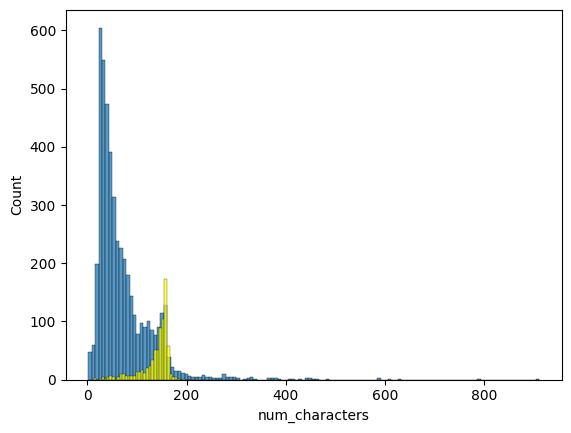

In [90]:
import seaborn as sns
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color="yellow")

<Axes: xlabel='num_words', ylabel='Count'>

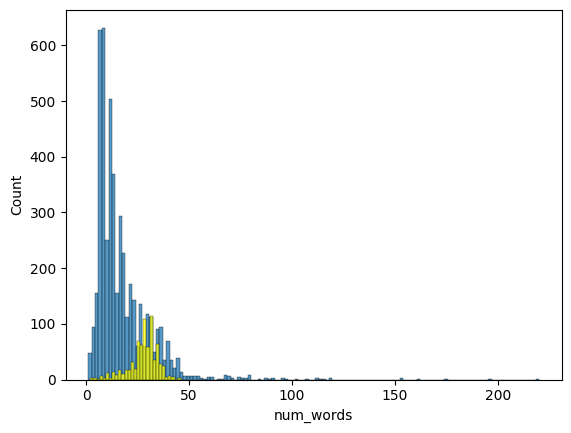

In [91]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color="yellow")

<Axes: xlabel='num_sentences', ylabel='Count'>

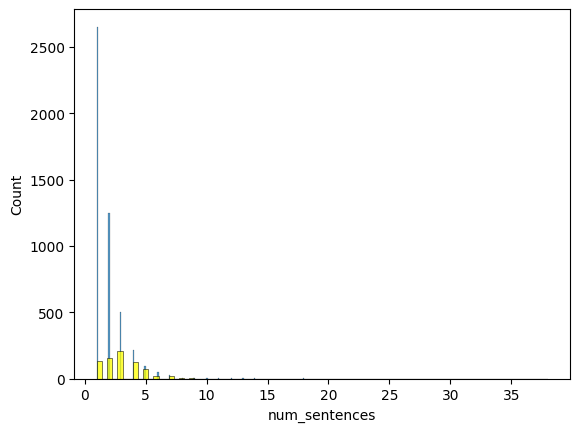

In [92]:
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color="yellow")

In [93]:
#SO IT IS VISIBLE THAT HAM MESSAGES CONTAIN MORE WORDS,CHAR,SENT THAN SPAM MESSAGES

In [94]:
#LETS CHECK ORE USING CORRELATION COEFFICIENT OF THESE CHARACTERISTICS BETWEEN EACH OTHER


In [95]:
df.select_dtypes(include='number').corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.387285,0.263221,0.265332
num_characters,0.387285,1.000000,0.966310,0.631881
num_words,0.263221,0.966310,1.000000,0.685165
num_sentences,0.265332,0.631881,0.685165,1.000000


<Axes: >

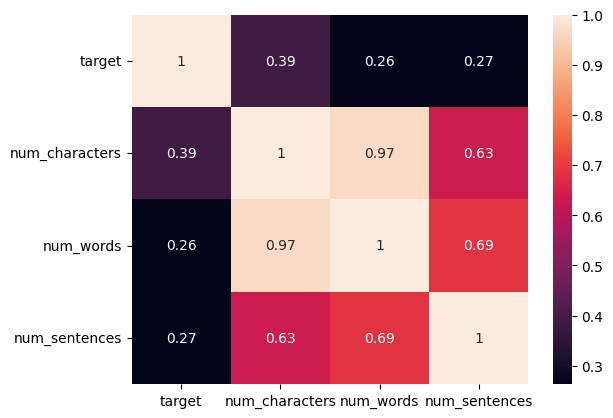

In [96]:
#correlation using heatmap

sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)

In [97]:
#SO WE CAN SE THAT TARGET IS MOSTLY DEPENDENT ON NUM CHAR WHERE CORR IS (0.39)
#SO IF WE WANT TO TAKE ONE AS A DECIDING COLUMN THEN WE WILL GO NUM_CHARATCERS(no of characters)

#**3.DATA PREPROCESSING**

*   lower case
*   tokenization
*   removing special characters(keep only alhpnum char)
*   removing stop words and punctuation
*   stemming(like dancing,dances,danced all equa to danc)





In [98]:
# ❌ Not alphanumeric:
# These are non-alphanumeric characters:

# Punctuation: !, ., ?, @, ,

# Symbols: #, $, %, &

# Whitespace: space ( ), tab (\t), newline (\n)

In [99]:
#WE WILL BW DOING THESE STEPS USING A FUNCTION OVER A TEXT


In [100]:
#for stop words
from nltk.corpus import stopwords
nltk.download('stopwords')

#for punctuation
import string

#for stemming
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [101]:
#function
def transform_text(text):
  text=text.lower() #lower case
  text=nltk.word_tokenize(text) #tokenization

  #removing special char(keeping only alphanumeric) ,removing stopwords, removing punctuatuion
  y=[]
  for i in text:
    if i.isalnum() and i not in stopwords.words('english') and i not in string.punctuation :
      y.append(i)

  text=y[:]
  y.clear()

  #stemming(always tokenize first)
  for i in text:
    y.append(ps.stem(i))

  #join them as a text (finally they shouldnt be as tokens)
  text= " ".join(y)
  return text


In [102]:
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [103]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [104]:
ps =PorterStemmer()
ps.stem('dancing')

'danc'

In [105]:
#check the function
transform_text('I loved the YT lectures on Machine Learning. How about you?')

'love yt lectur machin learn'

In [106]:
#check at dataset
transform_text(df['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [107]:
df['transformed_text']=df['text'].apply(transform_text)

In [108]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [109]:
#WORD CLOUD GIVES MOST USED WORDS
from wordcloud import WordCloud
wc= WordCloud(width=500,height=500,min_font_size=12,background_color='white')

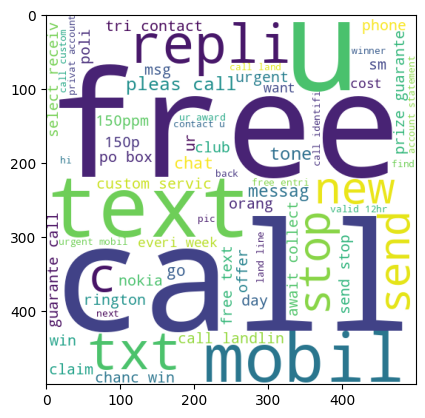

In [110]:
#FOR SPAM MESSAGES
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

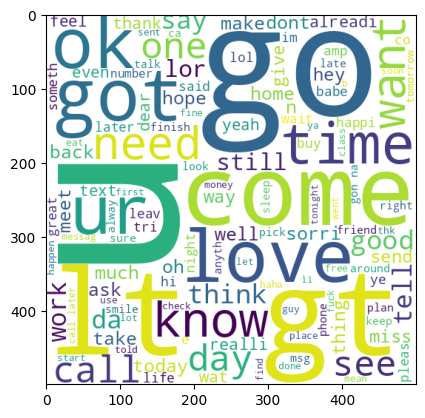

In [111]:
#FOR HAM MESSAGES
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

In [112]:
#TOP 30 WORDS IN SPAM MESSAGES
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)


In [113]:
len(spam_corpus)


11490

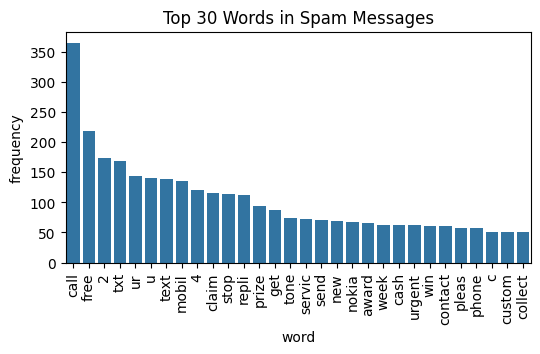

In [114]:
from collections import Counter
top_spam_words = Counter(spam_corpus).most_common(30)

# Step 3: Convert to DataFrame
spam_df = pd.DataFrame(top_spam_words, columns=['word', 'frequency'])

# Step 4: Plot using Seaborn
plt.figure(figsize=(6,3))
sns.barplot(x='word', y='frequency', data=spam_df)
plt.xticks(rotation='vertical')
plt.title("Top 30 Words in Spam Messages")
plt.show()

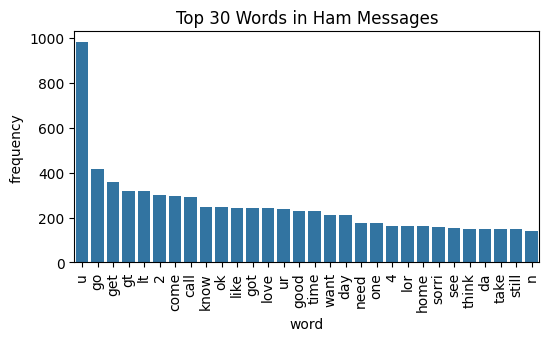

In [115]:
#TOP 30 WORDS IN HAM MESSAGES
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

    from collections import Counter
top_ham_words = Counter(ham_corpus).most_common(30)

# Step 3: Convert to DataFrame
ham_df = pd.DataFrame(top_ham_words, columns=['word', 'frequency'])

# Step 4: Plot using Seaborn
plt.figure(figsize=(6,3))
sns.barplot(x='word', y='frequency', data=ham_df)
plt.xticks(rotation='vertical')
plt.title("Top 30 Words in Ham Messages")
plt.show()

In [116]:
len(ham_corpus)

38221

#**4.MODEL BUILDING**


In [117]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [118]:
# X = cv.fit_transform(df['transformed_text']).toarray()
X = tfidf.fit_transform(df['transformed_text']).toarray()


In [119]:
X.shape

(5572, 6708)

In [120]:
y=df['target'].values

In [121]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [124]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [125]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [126]:
#CHECK PRECISION SCORE FOR ALL THREE METHODS

| CONFUSION.    MATRIX | **Predicted: Ham (0)** | **Predicted: Spam (1)** |
| -------------------- | ---------------------- | ----------------------- |
| **Actual: Ham (0)**  | True Negative (TN)     | False Positive (FP)     |
| **Actual: Spam (1)** | False Negative (FN)    | True Positive (TP)      |

Accuracy = (TP + TN) / Total

Precision = TP / (TP + FP)

Recall = TP / (TP + FN)

F1 = 2 × (Precision × Recall) / (Precision + Recall)

In [127]:
#for gaussian
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8690582959641255
[[844 113]
 [ 33 125]]
0.5252100840336135


In [128]:
#for multinomial
mnb.fit(X_train,y_train)
y_pred2= mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.957847533632287
[[957   0]
 [ 47 111]]
1.0


In [129]:
#for bernoullii
bnb.fit(X_train,y_train)
y_pred3= bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))


0.9695067264573991
[[956   1]
 [ 33 125]]
0.9920634920634921


In [130]:
#IMBALANCE DATA SO PRECISION SCORE(FALSE NEGATIVE SHOULD BE LEAST) MATTERS MOST THAT SHOULD BE HIGH
# --> SO WHILE APPLYING COUNTVECTORIZER WE GOT MAX PRECISION SCORE 0.992
#--> lets try it with  Tfidfvectorizer also


In [131]:
#SO FINALLLY AFTER APPLYING Tfidfvectorizer we got precision score 1 in multinomial bayes
#THIS STATE THAT WHILE USING MULTINOMIAL THERE WERE NO EMAIL WHICH WERE NOT SPAM AND WE CALLED IT SPAM
#SO WE WILL GO WITH MULTINOMIAL

# tfidf--> mnb

In [132]:
#WE GOT tfidf--> mnb precision sc 1 but lets check for all the models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [133]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [134]:
#create a dictionary for all classifir with keys and values
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}


In [135]:
# a function that takes these classifiers as input and train and test x,y

def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)
  return accuracy,precision

In [136]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9659192825112107, 0.9761904761904762)

In [137]:
#lets check for every algo using loop

accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():

  current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)

  print("For ",name)
  print("Accuracy- ",current_accuracy)
  print("precision- ",current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)



   #this if for max_features

For  SVC
Accuracy-  0.9659192825112107
precision-  0.9761904761904762
For  KN
Accuracy-  0.8986547085201794
precision-  1.0
For  NB
Accuracy-  0.957847533632287
precision-  1.0
For  DT
Accuracy-  0.9264573991031391
precision-  0.8653846153846154
For  LR
Accuracy-  0.9443946188340807
precision-  0.9444444444444444
For  RF
Accuracy-  0.9650224215246637
precision-  0.983739837398374
For  AdaBoost
Accuracy-  0.9130044843049328
precision-  0.9066666666666666
For  Bgc
Accuracy-  0.9587443946188341
precision-  0.9242424242424242
For  ETC
Accuracy-  0.9695067264573991
precision-  1.0
For  GBDT
Accuracy-  0.9426008968609866
precision-  0.9607843137254902
For  xgb
Accuracy-  0.9668161434977578
precision-  0.984


In [138]:
#lets create a dataframe comparing the scores

In [139]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precison':precision_scores}).sort_values('Precison',ascending=False)

In [140]:
performance_df

,Algorithm,Accuracy,Precison
1,KN,0.898655,1.000000
2,NB,0.957848,1.000000
8,ETC,0.969507,1.000000
10,xgb,0.966816,0.984000
5,RF,0.965022,0.983740
0,SVC,0.965919,0.976190
9,GBDT,0.942601,0.960784
4,LR,0.944395,0.944444
7,Bgc,0.958744,0.924242
6,AdaBoost,0.913004,0.906667


In [141]:
#NOW WE ARE CONSIDERING NB BUT WE CAN ALSO TAKE ETC
#by taking max_features=3000 accuracy of naive bayes also increased


#**4.MODEL IMPROVEMENT**

In [142]:
#WE CAN CHECK THE PRECISION AND ACCURACY BY ADDING ANOTHER METHODS LIKE
#TAKING MAX FEATURES=3000
#ADDING CHARACTER COLUMN TO VECTORIZER
#VOTING CLASSIFIER (MIXING MANY CLASSIFIER TO OBTAIN 1 )
#STACKING(SAME AS VOTING BY WE ADD WEIGHTAGE FOR EACH CLASSIFIER'S ALGO)

In [143]:
#IMPORTANT- WE TRIED MANY POSSIBILITIES TO OBTAIN BEST MODEL BUT THE FINAL WHICH GAVE BEST RESULT WAS
#NAIVE BAYES (MULTINOMIAL )

In [144]:
#NOW LETS PIPELINE THIS TO WEBSITE

In [145]:
#to take tfidf and mnb in a file and use them without training
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))


In [147]:
#download these files
from google.colab import files
files.download('model.pkl')
files.download('vectorizer.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>